In [19]:
%load_ext autoreload
%autoreload 2 
import os
import sys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss 

import connectivity.constants as const
from connectivity.data import Dataset
import connectivity.model as model
import connectivity.data as data
import connectivity.run as run
import connectivity.visualize as vis
import connectivity.figures as fig 

sys.path.append(os.path.abspath('../connectivity/scripts'))
from script_simulation import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model recovery simulations for the cerebellar connectivity project. 
Simulations of different true connectivity modes to test under what circumstances we can recover the true connectivity model from evaluating Ridge, Lasso, and WTA regression. Simulationations are performed under three scenarios: 
* `one2one`: For each cerebellar voxel, only one cortical parcel is connected. 
* `sparse`: For each cerebellar voxel, only 5% of the cortical parcels are connected with equal weight.  
* `normal`: Connectivity weights are normally distributed around 0: This is the generative models for Ridge regression. 

## Simulation under X being iid normals: 
This is the ideal case where X is iid normal distributed. 

In [8]:
def sim_scenario1(): 
    conn_type=['one2one','sparse','normal']
    sigma = [1.4,2.0,1.2]
    D=pd.DataFrame()
    Q =[7,40,80,160,240]
    for i,ct in enumerate(conn_type):
        for q in Q:
            print(f"{ct} for {q}")
            T = sim_random(Q=q,sigma=sigma[i],conn_type=ct)
            D=pd.concat([D,T],ignore_index=True)
    D.to_csv('simulation_iid.csv')
    return D 

D=sim_scenario1()

one2one for 7
one2one for 40
one2one for 80
one2one for 160
one2one for 240
sparse for 7
sparse for 40
sparse for 80
sparse for 160
sparse for 240
normal for 7
normal for 40
normal for 80
normal for 160
normal for 240


,conn_type,model,modelNum,numtessels,logalpha,Rin,Rout
0,one2one,ridge,0,7,2.0,0.515829,0.526297
1,one2one,lasso,1,7,-2.0,0.532561,0.549063
2,one2one,WTA_old,2,7,NaN,0.562282,0.580577
3,one2one,WTA,3,7,NaN,0.562905,0.581060
4,one2one,ridge,0,40,4.0,0.399134,0.338116
5,one2one,lasso,1,40,-1.0,0.501859,0.517058
6,one2one,WTA_old,2,40,NaN,0.434893,0.444904
7,one2one,WTA,3,40,NaN,0.552913,0.574572
8,one2one,ridge,0,80,6.0,0.384434,0.261056
9,one2one,lasso,1,80,-1.0,0.517954,0.510773


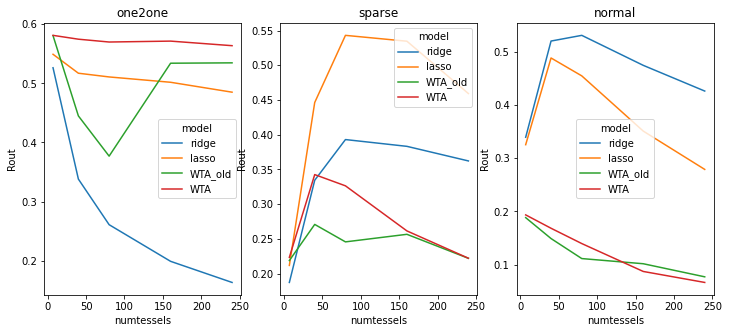

In [11]:
D = pd.read_csv('simulation_iid.csv')
conn_type=['one2one','sparse','normal']
# conn_type = np.unique(D.conn_type)
plt.figure(figsize=(12,5))
for i,ct in enumerate(conn_type):
    plt.subplot(1,3,i+1)
    sns.lineplot(data=D[D.conn_type==ct],x='numtessels',y='Rout',hue='model')
    plt.title(ct)


So in this case, model recovery is successful - the corresponding regression model wins. 
Note that differences between different number of tessels are arbitrary, as connectivity models are not correctly scaled. 

It should also be clear that the old WTA model is not appropriate, as it does not perform as well as 

Interesting point: In-sample cross-validation (Rin) does not distinguish between models as well... 

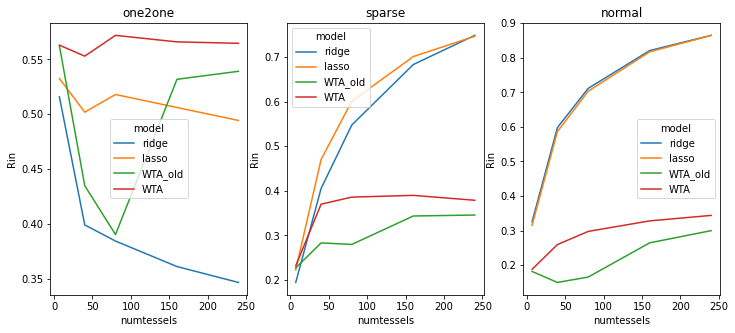

In [12]:
D = pd.read_csv('simulation_iid.csv')
conn_type=['one2one','sparse','normal']
# conn_type = np.unique(D.conn_type)
plt.figure(figsize=(12,5))
for i,ct in enumerate(conn_type):
    plt.subplot(1,3,i+1)
    sns.lineplot(data=D[D.conn_type==ct],x='numtessels',y='Rin',hue='model')
    plt.title(ct)

## Simulation under cortical X: 
So far, so good. The key question, however, is whether these results would hold up if we simulate under the much more co-linear situation of the real cortical activity we have. Also - in reality we are somewhere between the in-sample and out of sample validation, as sc1 and sc2 share task, but more importantly a lot of common covariance structure (even for the novel tasks).

For expedience, we are simulating here only the tessels0162 simulation - could be extended to running all resolution. 


In [ ]:
def sim_scenario2(): 
    conn_type=['one2one','sparse','normal']
    atlas = ['tessels0042','tessels0162','tessels0362','tessels0642','tessels1002']
    atlas = ['tessels0162']
    sigma = [2.0,3.0,2.0]
    sn = const.return_subjs
    D=pd.DataFrame()
    for i,ct in enumerate(conn_type):
        for s in sn:
            for a in atlas:
                print(f"{ct} for {a} for {s}")
                T = sim_cortical(sigma=sigma[i],conn_type=ct,atlas=a,sub=s)
                D=pd.concat([D,T],ignore_index=True)
    D.to_csv('simulation_cortex_0162.csv')
    return D 

D=sim_scenario2()

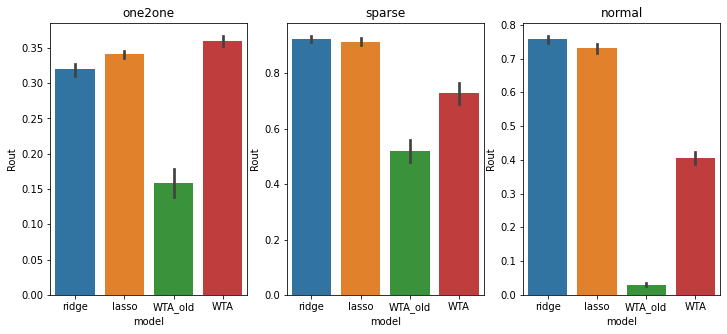

In [15]:
if __name__ == "__main__":
    D=pd.read_csv('simulation_cortex_0162.csv')
    conn_type=['one2one','sparse','normal']
    # conn_type = np.unique(D.conn_type)
    plt.figure(figsize=(12,5))
    for i,ct in enumerate(conn_type):
        plt.subplot(1,3,i+1)
        sns.barplot(data=D[D.conn_type==ct],x='model',y='Rout')
        plt.title(ct)
    pass


Except for the obvious fact that the old way of doung the WTA model does not work very well, this is very good news: If a one2one model was correct, it would actually win over ridge and lasso. Not obvious, as we have not accounted for model noiseceiling - also parameter estimation variance will be much higher in WTA than in Lasso and Ridge.

## Are regional difference a statistical artifact?
The last worry is that the regional differences in convergence maybe an artifact of the covariance structure of cortical activation. 
Here we address this by stimulating data from a one-to-one connectivity model for each of cortical parcel and estimating the areal activation from the lasso model. 

## Scaling factor on cortical activation
For the generalization of connectivity model, it is important how the different cortical activations are scaled. For the trainng of the models, we scale each cortical unit to length 1 across task. For generalization, we then use that scling factor and "blindly" apply it to the new data. Alternatively we could also a) not scale or b) scale by the current paradigm. Which one is most accurate will depend greatly on the sources of differences between std of cortical vectors. This can be a) signal-to-noise b) real activation variation.  

In [22]:
plot_scaling(atlas='tessels0162',exp='sc1')

<Figure size 432x288 with 0 Axes>